In [292]:
nltk.download('wordnet') # To download wordnet
nltk.download('omw-1.4') # To download omw-1.4
nltk.download('averaged_perceptron_tagger')# for POS tagging


import nltk # for natural language processing
from nltk.tokenize import sent_tokenize # For sentence tokenization
from nltk.tokenize import word_tokenize # For work tokenization
from nltk.probability import FreqDist # For identifying the frequency distribution
from nltk.corpus import stopwords # Identifying stopdwords
from nltk.stem import PorterStemmer # Stemming
from nltk.stem.wordnet import WordNetLemmatizer # Lemmatization
import matplotlib.pyplot as plt # For the plot

import numpy as np # for word cloud
from wordcloud import WordCloud # for word cloud
import pandas as pd # for loading data
from sklearn.feature_extraction.text import CountVectorizer # For bag of words
from nltk.tokenize import RegexpTokenizer # Tokenizing based on regular expression
from sklearn.model_selection import train_test_split # For train & test data split
from sklearn.naive_bayes import MultinomialNB # For Naive-bayes
from sklearn import metrics # Eror Metrics (Accuracy)
from sklearn.metrics import confusion_matrix,accuracy_score # Accuracy score
from sklearn.feature_extraction.text import TfidfVectorizer #for tf-idf




[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rm634391\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rm634391\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rm634391\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Text Mining with NLTK

In [293]:
# Loading the text for the text mining

text = """At the hour of the morning-drink a beloved said to her lover
by way of trial, “O such-and-such son of such-and-such,
I wonder, do you love me or yourself more? Tell the truth,
O man of sorrows.”
He replied, “I have become so naughted in thee that I am
full of thee from head to foot.
Of my existence there is nothing (left) in me but the name:
in my being there is naught but thee, O thou whose wishes are gratified.
By that means I have become thus naughted, like vinegar, in
thee (who are) an ocean of honey.”
As the stone that is entirely turned into pure ruby: it is filled with the qualities of the sun.
That stony nature does not remain in it: back and front, it is
filled with sunniness.
Afterwards, if it love itself, that (self-love) is love of the sun,O youth;
And if it love the sun with (all) its soul, ‘tis undoubtedly love of itself.
Whether the pure ruby loves itself or whether it loves the sun,
There is really no difference in these two loves: both sides
(aspects) are naught but the radiance of the sunrise.
Until it (the stone) has become a ruby, it is an enemy to itself,
because it is not a single “I”: two “I’s” are there;
For the stone is dark and blind to the day (-light): the dark is
essentially opposed to light.
(If) it love itself, it is an infidel, because it offers intense
resistance to the supreme Sun.
Therefore ‘tis not fitting that the stone should say “I,” (for)
it is wholly darkness and in (the state of) death.
A Pharaoh said, “I am God” and was laid low; a Mansur
(Hallaj) said, “I am God” and was saved.
The former “I” is followed by God’s curse and the latter
“I” by God’s mercy, O loving man;
For that one (Pharaoh) was a black stone, this one (Hallaj) a
cornelian; that one was an enemy to the Light, and this one
passionately enamoured (of it).
This “I,” O presumptuous meddler, was “He” (God) in the inmost
consciousness, through oneness with the Light, not
through (belief in) the doctrine of incarnation.
Strive that thy stony nature may be diminished, so that thy
stone may become resplendent with the qualities of the ruby.
Show fortitude in (enduring) self-mortification and affliction;
continually behold everlasting life in dying to self.
(Then) thy stoniness will become less at every moment, the
nature of the ruby will be strengthened in thee.
The qualities of (self-) existence will depart from thy body,
the qualities of intoxication (ecstasy) will increase in thy head (thy spiritual centre).
Become entirely hearing, like an ear, in order that thou mayst
gain an ear-ring of ruby."""

In [294]:
# Converting the text into lowercase
text = text.lower()
text

'at the hour of the morning-drink a beloved said to her lover\nby way of trial, “o such-and-such son of such-and-such,\ni wonder, do you love me or yourself more? tell the truth,\no man of sorrows.”\nhe replied, “i have become so naughted in thee that i am\nfull of thee from head to foot.\nof my existence there is nothing (left) in me but the name:\nin my being there is naught but thee, o thou whose wishes are gratified.\nby that means i have become thus naughted, like vinegar, in\nthee (who are) an ocean of honey.”\nas the stone that is entirely turned into pure ruby: it is filled with the qualities of the sun.\nthat stony nature does not remain in it: back and front, it is\nfilled with sunniness.\nafterwards, if it love itself, that (self-love) is love of the sun,o youth;\nand if it love the sun with (all) its soul, ‘tis undoubtedly love of itself.\nwhether the pure ruby loves itself or whether it loves the sun,\nthere is really no difference in these two loves: both sides\n(aspects)

### Part-Of-Speech Tagging

To identify the grammatical group of a given word. 

<B>Nouns</B>
NN(noun singular),  NNP(proper noun singular) NNS(noun plural) and NNPS(proper noun plural).

<B>Main Verbs</B>
VB(base form), VBD(past tense), VBG(gerund/present participle), VBN (past participle), VBP(singular present, non-3d), VBZ (3rd person singular present).


<B>Others</B><BR>
<PRE>CC: coordinating conjunction
CD: cardinal digit
DT: determiner
EX: existential there (like: "there is" ... think of it like "there exists")
FW: foreign word
IN: preposition/subordinating conjunction
JJ: adjective	'big'
JJR: adjective, comparative	'bigger'
JJS: adjective, superlative	'biggest'
LS: list marker	1)
MD: modal	could, will
PDT: predeterminer	'all the kids'
POS: possessive ending	parent\'s
PRP: personal pronoun	I, he, she
"PRP\$": possessive pronoun	my, his, hers
RB: adverb	very, silently,
RBR: adverb, comparative	better
RBS: adverb, superlative	best
RP: particle	give up
TO: to	go 'to' the store.
UH: interjection	errrrrrrrm
WDT: wh-determiner	which
WP: wh-pronoun	who, what
WP$: possessive wh-pronoun	whose
WRB: wh-abverb	where, when
</PRE>


In [295]:
nltk.pos_tag(tokenized_word)

[('wealth', 'NN'),
 ('has', 'VBZ'),
 ('no', 'DT'),
 ('permanence', 'NN'),
 (':', ':'),
 ('it', 'PRP'),
 ('comes', 'VBZ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('morning', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('at', 'IN'),
 ('night', 'NN'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('scattered', 'VBN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('winds', 'NNS'),
 ('.', '.'),
 ('physical', 'JJ'),
 ('beauty', 'NN'),
 ('too', 'RB'),
 ('has', 'VBZ'),
 ('no', 'DT'),
 ('importance', 'NN'),
 (',', ','),
 ('for', 'IN'),
 ('a', 'DT'),
 ('rosy', 'JJ'),
 ('face', 'NN'),
 ('is', 'VBZ'),
 ('made', 'VBN'),
 ('pale', 'NN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('scratch', 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('single', 'JJ'),
 ('thorn', 'NN'),
 ('.', '.'),
 ('noble', 'JJ'),
 ('birth', 'NN'),
 ('also', 'RB'),
 ('is', 'VBZ'),
 ('of', 'IN'),
 ('small', 'JJ'),
 ('account', 'NN'),
 (',', ','),
 ('for', 'IN'),
 ('many', 'JJ'),
 ('become', 'JJ'),
 ('fools', 'NNS'),
 ('of', 'IN'),
 ('money', 'NN'),
 ('and', 'CC'),
 ('horses', 'NNS'),
 ('

### Tokenization

Breaking down text into smaller chunks such as words or sentence. 

In [296]:
# Sentence Tokenizing the text
tokenized_sentence=sent_tokenize(text)

print(tokenized_sentence)

['at the hour of the morning-drink a beloved said to her lover\nby way of trial, “o such-and-such son of such-and-such,\ni wonder, do you love me or yourself more?', 'tell the truth,\no man of sorrows.”\nhe replied, “i have become so naughted in thee that i am\nfull of thee from head to foot.', 'of my existence there is nothing (left) in me but the name:\nin my being there is naught but thee, o thou whose wishes are gratified.', 'by that means i have become thus naughted, like vinegar, in\nthee (who are) an ocean of honey.”\nas the stone that is entirely turned into pure ruby: it is filled with the qualities of the sun.', 'that stony nature does not remain in it: back and front, it is\nfilled with sunniness.', 'afterwards, if it love itself, that (self-love) is love of the sun,o youth;\nand if it love the sun with (all) its soul, ‘tis undoubtedly love of itself.', 'whether the pure ruby loves itself or whether it loves the sun,\nthere is really no difference in these two loves: both si

In [297]:
# Word Tokenizing the text

tokenized_word=word_tokenize(text)
print(tokenized_word)

['at', 'the', 'hour', 'of', 'the', 'morning-drink', 'a', 'beloved', 'said', 'to', 'her', 'lover', 'by', 'way', 'of', 'trial', ',', '“', 'o', 'such-and-such', 'son', 'of', 'such-and-such', ',', 'i', 'wonder', ',', 'do', 'you', 'love', 'me', 'or', 'yourself', 'more', '?', 'tell', 'the', 'truth', ',', 'o', 'man', 'of', 'sorrows.', '”', 'he', 'replied', ',', '“', 'i', 'have', 'become', 'so', 'naughted', 'in', 'thee', 'that', 'i', 'am', 'full', 'of', 'thee', 'from', 'head', 'to', 'foot', '.', 'of', 'my', 'existence', 'there', 'is', 'nothing', '(', 'left', ')', 'in', 'me', 'but', 'the', 'name', ':', 'in', 'my', 'being', 'there', 'is', 'naught', 'but', 'thee', ',', 'o', 'thou', 'whose', 'wishes', 'are', 'gratified', '.', 'by', 'that', 'means', 'i', 'have', 'become', 'thus', 'naughted', ',', 'like', 'vinegar', ',', 'in', 'thee', '(', 'who', 'are', ')', 'an', 'ocean', 'of', 'honey.', '”', 'as', 'the', 'stone', 'that', 'is', 'entirely', 'turned', 'into', 'pure', 'ruby', ':', 'it', 'is', 'filled'

### Frequency Distribution

Identifying and plotting the distribution of frequent words in the text

In [298]:
# Frequency distribution on the tokenized word
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 215 samples and 597 outcomes>


In [299]:
# Printing most common 3 words
fdist.most_common(5)

[(',', 33), ('the', 32), ('(', 21), (')', 21), ('of', 19)]

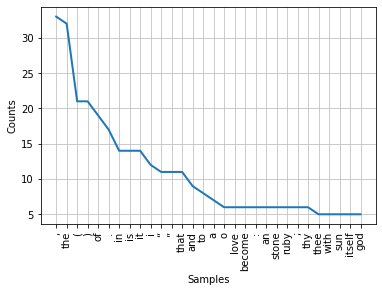

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [300]:
# Plotting the frequency distribution
fdist.plot(30,cumulative=False)

### Removal of Stopwords

Most commonly words (such as this, are, I, is,...) are called as stopwords and they are filtered out during the text analytics

In [301]:
# Printing stop words
stop_words=set(stopwords.words("english"))
print(stop_words)

{'does', "couldn't", 'wouldn', "didn't", "wasn't", 'again', 'shan', 'didn', 'only', 'until', 'are', "doesn't", 'll', "should've", 'same', 'because', 'do', 'when', 'hers', 'for', 'than', 'hasn', 'most', 'into', 'its', "haven't", "isn't", "mustn't", 'there', 'weren', 'on', "mightn't", "shouldn't", 'own', 'during', 'he', 'to', 'd', 'before', 'down', 'himself', 'has', 'my', 'of', 'don', 'we', 'm', 'isn', 'very', 'am', 'should', 'haven', 'nor', "aren't", 'have', 'after', 'yourself', "you've", 'out', 'our', 'mustn', 'wasn', 'your', 'with', 'more', "won't", 'doesn', 'as', 'it', 'you', 'themselves', 'itself', "you'd", "that'll", 'further', 'that', 'him', 'she', 'will', 'these', 'here', 'below', 'just', 'ain', 'who', 's', "weren't", 'a', 'shouldn', 'then', 'had', 'his', 'an', 've', 'at', 'me', 'were', 'few', 'won', 'up', "hasn't", 'and', 'herself', 'myself', 'whom', 'was', 'yours', "it's", 'so', 'couldn', "she's", "don't", 'theirs', 'her', "you'll", 'y', 'doing', 'other', 'i', 'such', 'from', '

In [302]:
# Removal of stop words
filtered_sentence=[]
for wd in tokenized_word:
    if wd not in stop_words:
        filtered_sentence.append(wd)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sentence)

Tokenized Sentence: ['at', 'the', 'hour', 'of', 'the', 'morning-drink', 'a', 'beloved', 'said', 'to', 'her', 'lover', 'by', 'way', 'of', 'trial', ',', '“', 'o', 'such-and-such', 'son', 'of', 'such-and-such', ',', 'i', 'wonder', ',', 'do', 'you', 'love', 'me', 'or', 'yourself', 'more', '?', 'tell', 'the', 'truth', ',', 'o', 'man', 'of', 'sorrows.', '”', 'he', 'replied', ',', '“', 'i', 'have', 'become', 'so', 'naughted', 'in', 'thee', 'that', 'i', 'am', 'full', 'of', 'thee', 'from', 'head', 'to', 'foot', '.', 'of', 'my', 'existence', 'there', 'is', 'nothing', '(', 'left', ')', 'in', 'me', 'but', 'the', 'name', ':', 'in', 'my', 'being', 'there', 'is', 'naught', 'but', 'thee', ',', 'o', 'thou', 'whose', 'wishes', 'are', 'gratified', '.', 'by', 'that', 'means', 'i', 'have', 'become', 'thus', 'naughted', ',', 'like', 'vinegar', ',', 'in', 'thee', '(', 'who', 'are', ')', 'an', 'ocean', 'of', 'honey.', '”', 'as', 'the', 'stone', 'that', 'is', 'entirely', 'turned', 'into', 'pure', 'ruby', ':', 

### Word Cloud

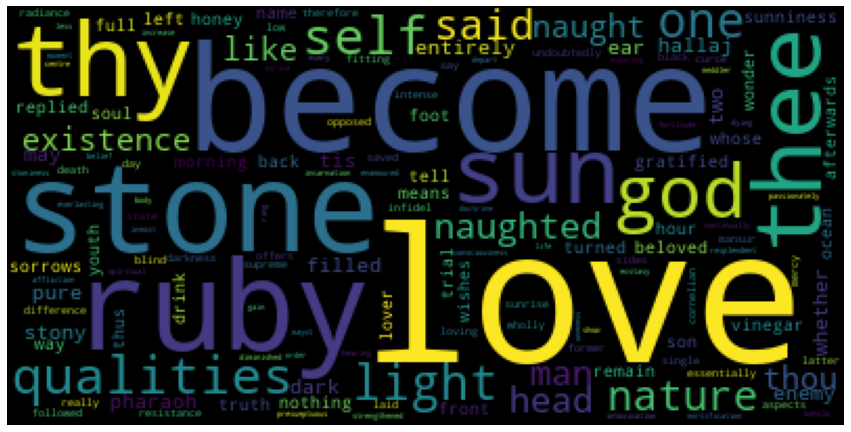

In [303]:
wordcloud = WordCloud(stopwords=stop_words, background_color='black', max_words=300).generate(text)

plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Stemming

Linguistic normalization that reduces words to their root word. 

In [304]:
# Stemming
ps = PorterStemmer()

stemmed_words=[]
for word in filtered_sentence:
    stemmed_words.append(ps.stem(word))

print("Filtered Sentence:",filtered_sentence)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['hour', 'morning-drink', 'beloved', 'said', 'lover', 'way', 'trial', ',', '“', 'such-and-such', 'son', 'such-and-such', ',', 'wonder', ',', 'love', '?', 'tell', 'truth', ',', 'man', 'sorrows.', '”', 'replied', ',', '“', 'become', 'naughted', 'thee', 'full', 'thee', 'head', 'foot', '.', 'existence', 'nothing', '(', 'left', ')', 'name', ':', 'naught', 'thee', ',', 'thou', 'whose', 'wishes', 'gratified', '.', 'means', 'become', 'thus', 'naughted', ',', 'like', 'vinegar', ',', 'thee', '(', ')', 'ocean', 'honey.', '”', 'stone', 'entirely', 'turned', 'pure', 'ruby', ':', 'filled', 'qualities', 'sun', '.', 'stony', 'nature', 'remain', ':', 'back', 'front', ',', 'filled', 'sunniness', '.', 'afterwards', ',', 'love', ',', '(', 'self-love', ')', 'love', 'sun', ',', 'youth', ';', 'love', 'sun', '(', ')', 'soul', ',', '‘', 'tis', 'undoubtedly', 'love', '.', 'whether', 'pure', 'ruby', 'loves', 'whether', 'loves', 'sun', ',', 'really', 'difference', 'two', 'loves', ':', 'sides', 

### Lemmatization

Lemmatization reduces words to their base word

In [305]:
# Lemmatization
lem = WordNetLemmatizer()

lem_words=[]
for word in stemmed_words:
    lem_words.append(lem.lemmatize(word, "v"))
    
print("Lemmatized Sentence:",lem_words)


Lemmatized Sentence: ['hour', 'morning-drink', 'belov', 'say', 'lover', 'way', 'trial', ',', '“', 'such-and-such', 'son', 'such-and-such', ',', 'wonder', ',', 'love', '?', 'tell', 'truth', ',', 'man', 'sorrows.', '”', 'repli', ',', '“', 'becom', 'naught', 'thee', 'full', 'thee', 'head', 'foot', '.', 'exist', 'noth', '(', 'leave', ')', 'name', ':', 'naught', 'thee', ',', 'thou', 'whose', 'wish', 'gratifi', '.', 'mean', 'becom', 'thu', 'naught', ',', 'like', 'vinegar', ',', 'thee', '(', ')', 'ocean', 'honey.', '”', 'stone', 'entir', 'turn', 'pure', 'rubi', ':', 'fill', 'qualiti', 'sun', '.', 'stoni', 'natur', 'remain', ':', 'back', 'front', ',', 'fill', 'sunni', '.', 'afterward', ',', 'love', ',', '(', 'self-lov', ')', 'love', 'sun', ',', 'youth', ';', 'love', 'sun', '(', ')', 'soul', ',', '‘', 'ti', 'undoubtedli', 'love', '.', 'whether', 'pure', 'rubi', 'love', 'whether', 'love', 'sun', ',', 'realli', 'differ', 'two', 'love', ':', 'side', '(', 'aspect', ')', 'naught', 'radianc', 'sunris

# Sentiment Analysis using Text Classification

### Loading data

In [306]:
# Loading the data 

data=pd.read_csv('C:/Users/rm634391/Analytics/Kaggle/Sentiment/train.tsv', sep='\t')

# Printing first 5 rows
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [307]:
# Data frame information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

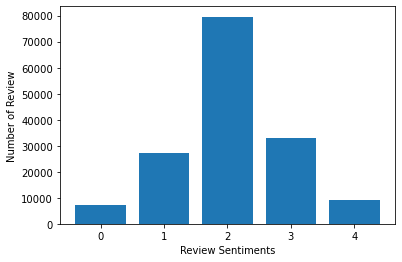

In [308]:
# Plotting the sentiment count (from Sentiment columns)

Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

### Feature Generation Using Bag of Words

This step is done primarily to convert the text into vectors of numbers to be able to perform classification.

Bag of words converts text into matrix of occurence of words within a document. This model focuses on whether given words occured or not in the document

In [309]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['Phrase'])

In [310]:
print ("The rows & columns of the bag of words matrix: " ,text_counts.shape)

The rows & columns of the bag of words matrix:  (156060, 14988)


### Train & Test Data Split

We are trying to predict the sentiment (Y) based on the words

In [311]:
# 30% of data is split into test
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.3, random_state=1)

### Model Building 

The multinomial Naive Bayes classifier (Text Classification Model) using TF-IDF.

The multinomial distribution normally requires integer feature counts. However, we can leverage fractional counts such as tf-idf as well.

In [312]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


The issue with above approach of using term frequency (output of bag of words model) is that it will give more weight to longer documents. Hence we will be using IDF(Inverse Document Frequency) which measures the amount of information a given word provides across the document. IDF is the logarithmically scaled inverse ratio of the number of documents that contain the word and the total number of documents.

TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix. It is the product of TF and IDF. Word with high tf-idf in a document, it is most of the times occurred in given documents and must be absent in the other documents. So the words must be a signature word

In [313]:
# Vectorizing with TF-IDF
tf=TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_tf= tf.fit_transform(data['Phrase'])

In [314]:
print ("The rows & columns of the TF-IDF matrix: " ,text_tf.shape)

The rows & columns of the TF-IDF matrix:  (156060, 14988)


In [315]:
# Repeating the train & test split for the new model fit with TF-IDF

X_train, X_test, y_train, y_test = train_test_split(text_tf, data['Sentiment'], test_size=0.3, random_state=123)

In [316]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5887479174676407


In [317]:
cm = confusion_matrix(y_test, predicted)
ac = accuracy_score(y_test,predicted)
ac

0.5887479174676407